In [1]:
from common import colors, sbarlw

In [2]:
import os; os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import pandas as pd
import ezephys.rectools as rt
from ezephys import pltools

from grr.Trace import Trace

# Setup

In [4]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'fI')
DATA_PATH = os.path.join('data', 'raw')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

# Load data

In [5]:
loader = rt.ABFLoader()

# Short current step recordings.
short_fnames = {}
short_recs = {}
for cell_type in ['5HT', 'GABA', 'mPFC']:
    short_fnames[cell_type] = pd.read_csv(os.path.join(DATA_PATH, cell_type, 'current_steps', 'index.csv'))
    short_recs[cell_type] = loader.load(
        [os.path.join(DATA_PATH, cell_type, 'current_steps', fname_) for fname_ in short_fnames[cell_type]['Steps']]
    )

# Long current step recordings.
long_fnames = {}
long_recs = {}
for cell_type in ['5HT', 'GABA']:
    long_fnames[cell_type] = pd.read_csv(os.path.join(DATA_PATH, cell_type, 'long_curr_steps', 'index.csv'))
    long_recs[cell_type] = {}
    long_recs[cell_type]['weak'] = loader.load(
        [
            os.path.join(DATA_PATH, cell_type, 'long_curr_steps', fname_) 
            for fname_ in long_fnames[cell_type]['weak_steps']
            if isinstance(fname_, str)
        ]
    )
    long_recs[cell_type]['strong'] = loader.load(
        [
            os.path.join(DATA_PATH, cell_type, 'long_curr_steps', fname_) 
            for fname_ in long_fnames[cell_type]['strong_steps']
            if isinstance(fname_, str)
        ]
    )

In [6]:
short_fnames['5HT']

,Cell,R,C,hold,Steps
0,DRN159,707,43,-11.0,17n23013.abf
1,DRN160,365,79,-9.8,17n23017.abf
2,DRN162,485,57,-17.1,17n23022.abf
3,DRN163,1400,61,2.4,17n23027.abf
4,DRN164,919,39,-27.0,17n23034.abf
5,DRN165,759,63,-14.6,17n23038.abf
6,DRN196,923,74,-6.0,18111055.abf
7,DRN316,1200,40,-8.5,18420001.abf
8,DRN317,743,93,3.7,18420006.abf
9,DRN318,702,51,-8.0,18420025.abf


In [7]:
short_fnames['GABA']

,Cell,R,C,hold,Steps
0,DRN350,1700,42.0,-0.6,18711000.abf
1,DRN351,1600,38.0,-7.3,18711018.abf
2,DRN354,831,59.0,-8.5,18711033.abf
3,DRN355,960,36.0,-20.0,18711046.abf
4,DRN356,564,50.5,-5.5,18711060.abf
5,DRN357,552,55.0,-7.3,18711076.abf
6,DRN358,1200,38.0,10.0,18711091.abf
7,DRN421,836,71.0,-11.0,19114005.abf
8,DRN422,1400,57.0,13.4,19114022.abf
9,DRN424,1400,32.0,-9.8,19114045.abf


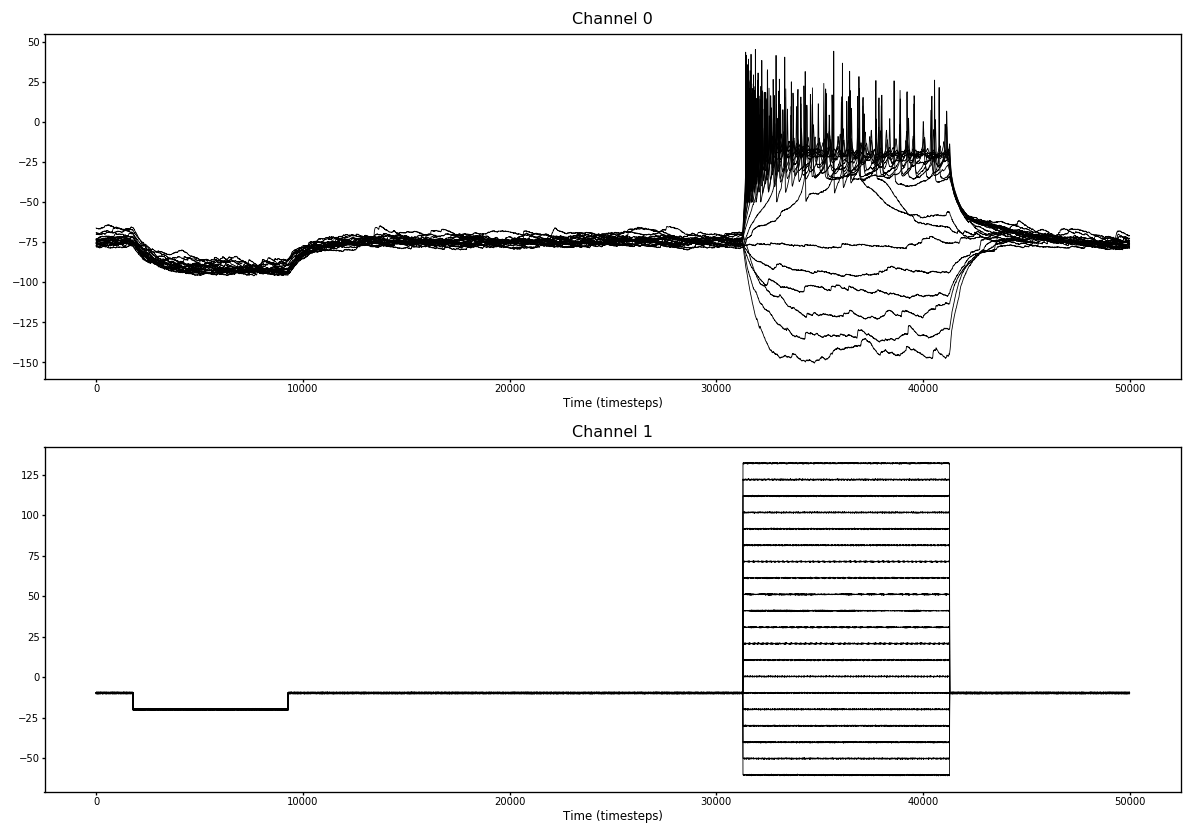

In [8]:
short_recs['GABA'][0].plot()

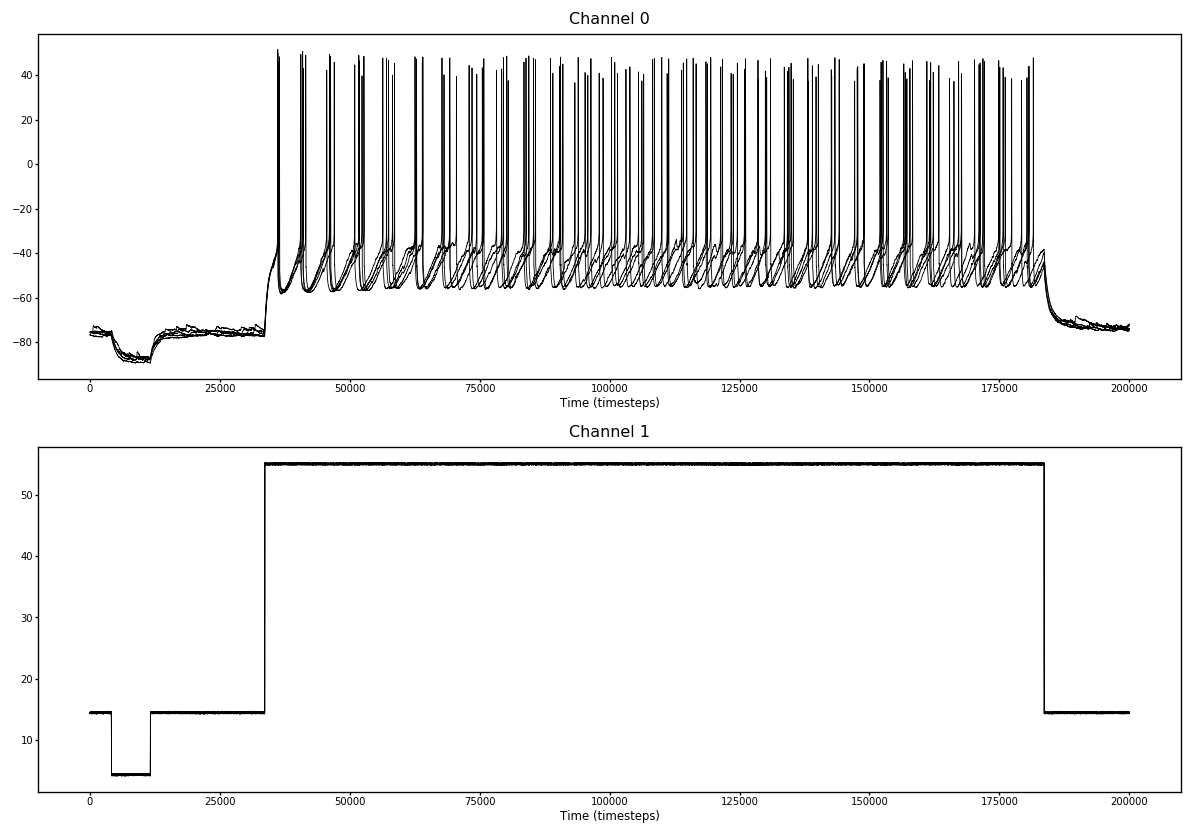

In [9]:
long_recs['5HT']['strong'][0].plot()

# Short current steps

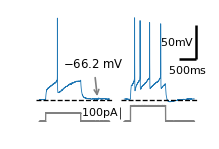

In [10]:
sample_rec = short_recs['5HT'][1]
time_slice = slice(20000, 40000)
baseline = sample_rec[0, time_slice.start:(time_slice.start + 500), :].mean()

steps_trace_spec = gs.GridSpec(
    2, 
    2, 
    height_ratios=[1, 0.2], 
    hspace=0,
    wspace=0.1,
    top=0.95,
    right=0.95,
    bottom=0.05,
    left=0.05
)

plt.figure(figsize=(1.5, 1))

plt.subplot(steps_trace_spec[0, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 9], color=colors['ser'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
ylim = plt.ylim()
xlim = plt.xlim()
pltools.hide_border('a')
plt.annotate(
    '${:.1f}$ mV'.format(baseline), 
    (0.8, 0.05), 
    xytext=(0.75, 0.4),
    ha='center',
    xycoords=plt.gca().transAxes,
    textcoords=plt.gca().transAxes,
    fontsize=7,
    arrowprops={'arrowstyle': '->'}
)

plt.subplot(steps_trace_spec[1, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice, 9], color=colors['input'])
plt.xlim(xlim)
input_ylim = (-10, 140)
plt.ylim(input_ylim)
pltools.add_scalebar(y_units='pA', omit_x=True, anchor=(1.1, 0.1), linewidth=sbarlw)

plt.subplot(steps_trace_spec[0, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 15], color=colors['ser'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
pltools.add_scalebar('ms', 'mV', x_size=500, bar_space=0, x_label_space=-0.05, anchor=(0.98, 0.5), linewidth=sbarlw)
plt.ylim(ylim)
plt.xlim(xlim)

plt.subplot(steps_trace_spec[1, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice, 15], color=colors['input'])
plt.xlim(xlim)
plt.ylim(input_ylim)
pltools.hide_border('a')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_current_steps.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_current_steps.svg'))

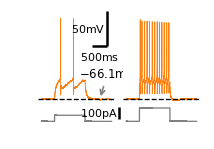

In [11]:
sample_rec = short_recs['GABA'][4]
time_slice = slice(27000, 50000)
baseline = sample_rec[0, time_slice.start:(time_slice.start + 500), :].mean()

steps_trace_spec = gs.GridSpec(
    2, 
    2, 
    height_ratios=[1, 0.2], 
    hspace=0,
    wspace=0.1,
    top=0.95,
    right=0.95,
    bottom=0.05,
    left=0.05
)

plt.figure(figsize=(1.5, 1))

plt.subplot(steps_trace_spec[0, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 10], color=colors['som'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
ylim = plt.ylim()
xlim = plt.xlim()
pltools.add_scalebar('ms', 'mV', x_size=500, bar_space=0, x_label_space=-0.05, anchor=(0.9, 0.65), linewidth=sbarlw)

plt.annotate(
    '${:.1f}$mV'.format(baseline), 
    (0.8, 0.05), 
    xytext=(0.9, 0.3),
    ha='center',
    xycoords=plt.gca().transAxes,
    textcoords=plt.gca().transAxes,
    fontsize=7,
    arrowprops={'arrowstyle': '->'}
)

plt.subplot(steps_trace_spec[1, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice,10], color=colors['input'])
plt.xlim(xlim)
input_ylim = (-10, 140)
plt.ylim(input_ylim)
pltools.add_scalebar(y_units='pA', omit_x=True, anchor=(1.05, 0.1), linewidth=sbarlw)

plt.subplot(steps_trace_spec[0, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 16], color=colors['som'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
pltools.hide_border('a')
plt.ylim(ylim)
plt.xlim(xlim)

plt.subplot(steps_trace_spec[1, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice, 16], color=colors['input'])
plt.xlim(xlim)
plt.ylim(input_ylim)
pltools.hide_border('a')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_current_steps.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_current_steps.svg'))

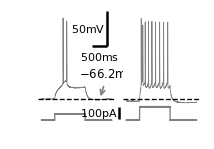

In [12]:
sample_rec = short_recs['mPFC'][4]
time_slice = slice(29000, 52000)
baseline = sample_rec[0, time_slice.start:(time_slice.start + 500), :].mean()

steps_trace_spec = gs.GridSpec(
    2, 
    2, 
    height_ratios=[1, 0.2], 
    hspace=0,
    wspace=0.1,
    top=0.95,
    right=0.95,
    bottom=0.05,
    left=0.05
)

plt.figure(figsize=(1.5, 1))

plt.subplot(steps_trace_spec[0, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 10], color=colors['pyr'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
ylim = plt.ylim()
xlim = plt.xlim()
pltools.add_scalebar('ms', 'mV', x_size=500, bar_space=0, x_label_space=-0.05, anchor=(0.9, 0.65), linewidth=sbarlw)

plt.annotate(
    '${:.1f}$mV'.format(baseline), 
    (0.8, 0.05), 
    xytext=(0.9, 0.3),
    ha='center',
    xycoords=plt.gca().transAxes,
    textcoords=plt.gca().transAxes,
    fontsize=7,
    arrowprops={'arrowstyle': '->'}
)

plt.subplot(steps_trace_spec[1, 0])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice,10], color=colors['input'])
plt.xlim(xlim)
input_ylim = (-10, 140)
plt.ylim(input_ylim)
pltools.add_scalebar(y_units='pA', omit_x=True, anchor=(1.05, 0.1), linewidth=sbarlw)

plt.subplot(steps_trace_spec[0, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[0, time_slice, 16], color=colors['pyr'], lw=0.5)
plt.axhline(baseline, ls='--', color='k')
pltools.hide_border('a')
plt.ylim(ylim)
plt.xlim(xlim)

plt.subplot(steps_trace_spec[1, 1])
plt.plot(sample_rec[:, time_slice, :].time_supp, sample_rec[1, time_slice, 16], color=colors['input'])
plt.xlim(xlim)
plt.ylim(input_ylim)
pltools.hide_border('a')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_current_steps.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_current_steps.svg'))

# Long current steps

## Export traces


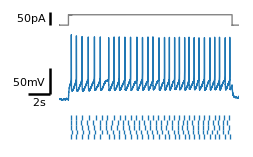

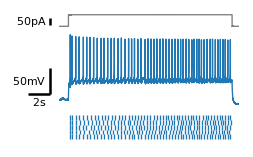

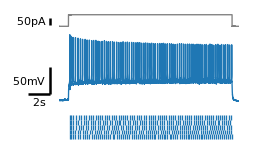

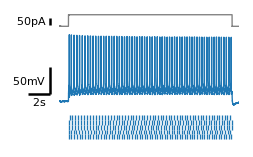

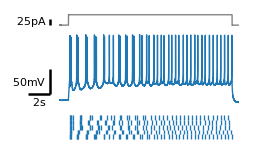

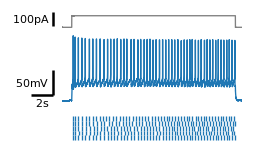

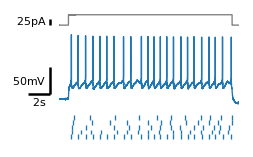

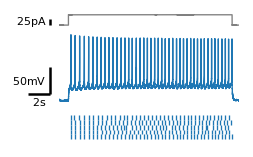

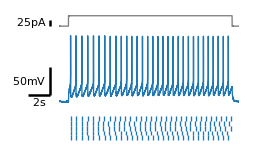

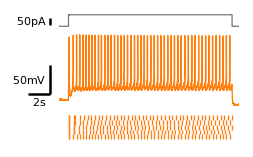

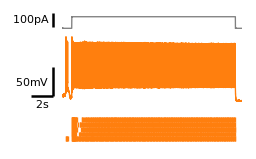

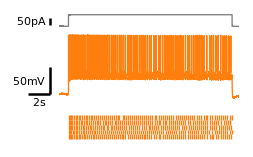

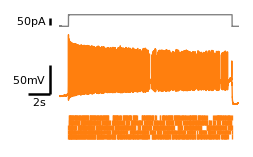

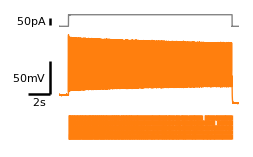

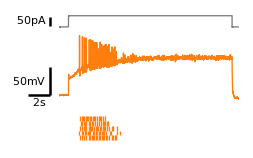

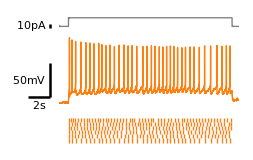

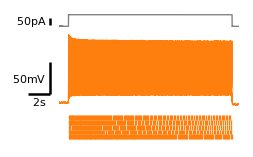

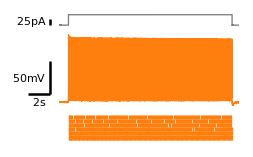

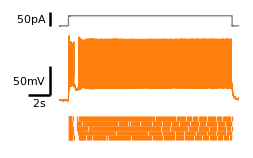

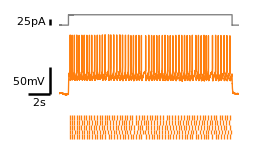

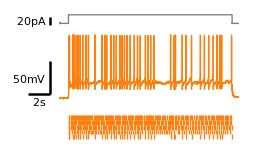

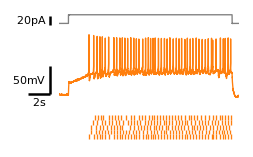

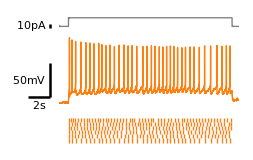

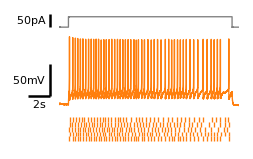

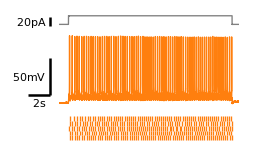

In [13]:
xlims = (2.5, 19.)
sample_sweep_no = 0

sample_trace_spec = gs.GridSpec(
    3, 1, height_ratios=[0.2, 1., 0.4], hspace=0.05, top=0.95, left=0.2, bottom=0.05, right=0.95
)

for cell_type in long_recs:
    if cell_type == 'mPFC':
        color = colors['pyr']
    elif cell_type == '5HT':
        color = colors['ser']
    elif cell_type == 'GABA':
        color = colors['som']
    else:
        raise RuntimeError('Unrecognized cell type {}'.format(cell_type))
    
    for cond in ['strong', 'weak']:
        for i, rec in enumerate(long_recs[cell_type][cond]):

            plt.figure(figsize=(2., 1.2))

            plt.subplot(sample_trace_spec[0, :])
            plt.plot(rec.time_supp * 1e-3, rec[1, ...].mean(axis=1), color=colors['input'])
            plt.margins(0.05, 0.1)
            plt.xlim(xlims)
            pltools.add_scalebar(y_units='pA', omit_x=True, anchor=(-0.05, 0.2), linewidth=sbarlw)

            plt.subplot(sample_trace_spec[1, :])
            plt.plot(rec.time_supp * 1e-3, rec[0, :, sample_sweep_no], color=color)
            plt.xlim(xlims)
            pltools.add_scalebar(x_units='s', y_units='mV', x_size=2, x_on_left=True, anchor=(-0.05, 0.2), bar_space=0, linewidth=sbarlw)

            plt.subplot(sample_trace_spec[2, :])

            # Scrape spike times.
            spktimes = []
            for j in range(rec.shape[2]):
                tr_tmp = Trace(rec[0, :, j], rec[1, :, j], rec.shape[1] * rec.dt, rec.dt)
                tr_tmp.detectSpikes()
                spktimes.append(tr_tmp.getSpikeTimes() * 1e-3)

            plt.eventplot(spktimes, color=color)
            plt.xlim(xlims)
            pltools.hide_border('a')
            pltools.hide_ticks()

            if IMG_PATH is not None:
                plt.savefig(os.path.join(IMG_PATH, '{}_{}_{}_long_current_steps.png'.format(cell_type, i+1, cond)))

            plt.show()

del tr_tmp, spktimes, cell_type, rec